<div style="text-align: center; font-size: 16px;">
    <strong>Course:</strong> Machine Learning Operations |
    <strong>Lecturer:</strong> Prof. Dr. Klotz |
    <strong>Date:</strong> 17.05.2025 |
    <strong>Name:</strong> Sofie Pischl
</div>

# <center>Preprocessing</center>

# Struktur des Notebooks

## 1. Setup und Bibliotheken

In diesem Abschnitt werden alle ben√∂tigten Bibliotheken importiert und notwendige NLP-Ressourcen geladen (z.‚ÄØB. NLTK-Modelle).

In [ ]:
import os
import pandas as pd
#pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_colwidth')
pd.set_option('display.max_columns', None)
import numpy as np
import re
from pathlib import Path
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from textblob import TextBlob
import logging
import sqlite3

# Logging Setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# NLTK-Ressourcen laden
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /Users/sofl3/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/sofl3/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/sofl3/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sofl3/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## 2. Daten laden

Hier werden die Rohdaten aus TikTok, YouTube und Reddit eingelesen.


In [ ]:
BASE_DIR = Path().resolve().parent
RAW_DIR = (BASE_DIR / "./data").resolve()

# DB-Pfad
DB_PATH = Path(BASE_DIR / "data/social_media.db")

# Verbindung √∂ffnen
conn = sqlite3.connect(DB_PATH)

# Lese jede Tabelle einzeln
df_reddit = pd.read_sql_query("SELECT * FROM reddit_data", conn)
df_tiktok = pd.read_sql_query("SELECT * FROM tiktok_data", conn)
df_youtube = pd.read_sql_query("SELECT * FROM youtube_data", conn)

conn.close()

dfs = {
    "Reddit": df_reddit,
    "TikTok": df_tiktok,
    "YouTube": df_youtube
}

for name, df in dfs.items():
    print(f"\nüìä === {name} Data ===")
    print("üîπ Kopf der Tabelle:")
    print(display(df.head()), "\n")
    
    print("üîπ Info:")
    df.info()
    print("\n" + "-"*50)


üìä === Reddit Data ===
üîπ Kopf der Tabelle:


id  \
0  8be61f8d1c51cc3455edab639cba425e   
1  3b1b90fc5a5bd6a0f94520a092025594   
2  c0c900e9ade80cb4f515058aa9d46935   
3  2b85537cf40b516ef32e14dd2ab51bcd   
4  3425bee6d1a5174eeb5c57e3537e5ad9   

                                               title author  score  \
0  She erased us from her wedding. So I‚Äôm erasing...          4545   
1  UPDATE: AITAH for telling my MIL to stop calli...          4137   
2  Conservatives, if you cared about Hunter Biden...          3600   
3  What‚Äôs a subtle sign that someone has been thr...          3355   
4  TIFU by trying to flirt with a guy at the gym ...          2138   

   created_utc  num_comments  \
0   1746242393          1044   
1   1746229105           247   
2   1746228869           777   
3   1746230270          1469   
4   1746237908           174   

                                                 url subreddit  \
0  https://www.reddit.com/r/pettyrevenge/comments...       all   
1  https://www.reddit.com/r/AITAH/comments/1kdhk8...       all   
2  https://www.reddit.com/r/AskUS/comments/1kdhhk...       all   
3  https://www.reddit.com/r/AskReddit/comments/1k...       all   
4  https://www.reddit.com/r/tifu/comments/1kdk6o7...       all   

            scraped_at  
0  2025-05-03 08:58:16  
1  2025-05-03 08:58:16  
2  2025-05-03 08:58:16  
3  2025-05-03 08:58:16  
4  2025-05-03 08:58:16

None 

üîπ Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            705 non-null    object
 1   title         705 non-null    object
 2   author        705 non-null    object
 3   score         705 non-null    int64 
 4   created_utc   705 non-null    int64 
 5   num_comments  705 non-null    int64 
 6   url           705 non-null    object
 7   subreddit     705 non-null    object
 8   scraped_at    705 non-null    object
dtypes: int64(3), object(6)
memory usage: 49.7+ KB

--------------------------------------------------

üìä === TikTok Data ===
üîπ Kopf der Tabelle:


id                                        description  \
0  7493469801654881542  #vairalvideo_foryoupage  #üá¶üá´ÿßÿ≤ÿ®⁄©_ÿ™ÿßÿ¨⁄©_Ÿæÿ¥ÿ™ŸàŸÜ_ÿ™ÿ±...   
1  7489427780397010198  #imapoliceofficer #tensheet #foryou #viral #fy...   
2  7492000423641959685  #CapCut #ŸÇŸàÿßŸÑÿ®_ŸÉÿßÿ®_ŸÉÿßÿ™_ÿ¨ÿßŸáÿ≤Ÿá_ŸÑŸÑÿ™ÿµŸÖŸäŸÖ__üå¥‚ô• #ŸÉÿßÿ®_...   
3  7472584144510373125                          i think it was a bad idea   
4  7461927005689302280  welcome to the thanos world!! #squidgame #squi...   

         author_username            author_id     likes   shares  comments  \
0             afgcap.cut  7461541069958153234     15800      451       258   
1      backwheelbandit69  7416366442453632032   4400000   308300     11800   
2   noordeen_cap_cat_0_1  7322835376556442629     58400     1576       451   
3             maligoshik  7014608336423617542  19000000  1300000     26500   
4  team_thanos_player230  7455509281098515474    261400     9526     13000   

       plays                                          video_url  created_time  \
0     365200  https://webapp-va.tiktok.com/88847b04ddf03213d...    1744709406   
1   43200000  https://v16-webapp-prime.tiktok.com/video/tos/...    1743768297   
2    1300000  https://webapp-va.tiktok.com/6508d64d970e751a2...    1744367290   
3  186100000  https://v16-webapp-prime.tiktok.com/video/tos/...    1739846584   
4   12400000  https://webapp-sg.tiktok.com/bf63b8aa40b9ff0ca...    1737365272   

            scraped_at  
0  2025-05-11 15:19:41  
1  2025-05-11 15:19:41  
2  2025-05-11 15:19:41  
3  2025-05-11 15:19:42  
4  2025-05-11 15:06:10

None 

üîπ Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1406 entries, 0 to 1405
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1406 non-null   object
 1   description      1403 non-null   object
 2   author_username  1406 non-null   object
 3   author_id        1406 non-null   object
 4   likes            1406 non-null   int64 
 5   shares           1406 non-null   int64 
 6   comments         1406 non-null   int64 
 7   plays            1406 non-null   int64 
 8   video_url        1396 non-null   object
 9   created_time     1406 non-null   int64 
 10  scraped_at       1406 non-null   object
dtypes: int64(5), object(6)
memory usage: 121.0+ KB

--------------------------------------------------

üìä === YouTube Data ===
üîπ Kopf der Tabelle:


video_id                                              title  \
0  -F33ACcPbhU  Monster Hunter Wilds ‚Äì Festival of Accord: Blo...   
1  -H8tvnWaYs4  Chelsea 3-1 Liverpool | HIGHLIGHTS | Premier L...   
2  -JFW5V4U6bo  Picks 1-10: Jaguars TRADE UP For Travis Hunter...   
3  -K8jSo03dEk            planes if they were 10,000 times better   
4  -QwXokuIZjM        Peacemaker Season 2 | Official Teaser | Max   

           channel_title  view_count  like_count  comment_count  \
0         Monster Hunter      195940        9298            619   
1  Chelsea Football Club     1333458       28389            780   
2                    NFL      443795        8052           1112   
3     Ice Cream Sandwich      863723       81195           4095   
4                    Max     1829543       96169           6397   

          published_at           scraped_at  
0  2025-04-22 01:00:25  2025-04-22 22:06:12  
1  2025-05-04 21:00:09  2025-05-05 18:10:08  
2  2025-04-25 01:55:00  2025-04-25 14:45:45  
3  2025-05-03 02:01:54  2025-05-04 09:00:05  
4  2025-05-09 16:05:08  2025-05-10 13:41:28

None 

üîπ Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   video_id       350 non-null    object
 1   title          350 non-null    object
 2   channel_title  350 non-null    object
 3   view_count     350 non-null    int64 
 4   like_count     350 non-null    int64 
 5   comment_count  350 non-null    int64 
 6   published_at   350 non-null    object
 7   scraped_at     350 non-null    object
dtypes: int64(3), object(5)
memory usage: 22.0+ KB

--------------------------------------------------


## 3. Textbereinigung und Feature-Extraktion

Hier definieren wir Funktionen zur Reinigung, Lemmatization, Stopwortfilterung und Extraktion von Textmerkmalen f√ºr Sentimentanalyse und Topic Modeling.


In [5]:
def remove_emojis(text):
    if not isinstance(text, str):
        return ""
    emoji_pattern = re.compile(
        "[" 
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        u"\U00002700-\U000027BF"
        u"\U000024C2-\U0001F251"
        "]", flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'): return wordnet.ADJ
    elif treebank_tag.startswith('V'): return wordnet.VERB
    elif treebank_tag.startswith('N'): return wordnet.NOUN
    elif treebank_tag.startswith('R'): return wordnet.ADV
    return wordnet.NOUN

def lemmatize_tokens(tokens):
    tagged = pos_tag(tokens)
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w, get_wordnet_pos(t)) for w, t in tagged]

def preprocess_text(text, remove_stopwords=True):
    if not isinstance(text, str):
        return ""

    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = remove_emojis(text)
    text = re.sub(r'#(\w+)', r'\1', text)
    text = re.sub(r'[^\w\s\']', ' ', text)
    text = re.sub(r'\s\'|\'\s', ' ', text)
    text = ' '.join(text.split())

    tokens = word_tokenize(text)

    if remove_stopwords:
        stop_words = set()
        for lang in ['english', 'german']:
            try:
                stop_words.update(stopwords.words(lang))
            except:
                logger.warning(f"Stopwords for {lang} not available")
        important_words = {"n't", "'s", "'m", "'re", "'ve", "'ll", "no", "not"}
        stop_words -= important_words
        tokens = [token for token in tokens if token.lower() not in stop_words]

    return ' '.join(lemmatize_tokens(tokens))

def extract_text_features(text):
    if not isinstance(text, str) or not text.strip():
        return {
            'word_count': 0,
            'char_count': 0,
            'avg_word_length': 0,
            'sentiment_polarity': 0,
            'sentiment_subjectivity': 0
        }
    words = text.split()
    blob = TextBlob(text)
    return {
        'word_count': len(words),
        'char_count': len(text),
        'avg_word_length': len(text) / len(words),
        'sentiment_polarity': blob.sentiment.polarity,
        'sentiment_subjectivity': blob.sentiment.subjectivity
    }

def apply_text_processing(df, col):
    df = df.copy()
    df[f"{col}_processed"] = df[col].astype(str).apply(preprocess_text)
    features = df[f"{col}_processed"].apply(extract_text_features)
    return pd.concat([df, pd.DataFrame(features.tolist())], axis=1)


## 4. Plattformdaten bereinigen

Die Inhalte der Plattformen unterscheiden sich strukturell, daher erfolgt die Bereinigung pro Quelle individuell.


## Reddit

In [6]:
def clean_reddit_data(path: Path) -> pd.DataFrame:
   
    # Sicherstellen, dass Datumsspalten korrekt sind
    for date_col in ['created', 'scraped_at']:
        if date_col in df.columns:
            df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

    # Nur relevante Spalten behalten
    relevant_columns = ['subreddit', 'title', 'text', 'score', 'comments', 'created', 'url', 'scraped_at']
    existing_columns = [col for col in relevant_columns if col in df.columns]
    df = df[existing_columns].copy()

    # NaNs entfernen (essentielle Felder)
    df = df.dropna(subset=['text'])

    # Duplikate entfernen
    df = df.drop_duplicates(subset=['text'])

    # Fehlende scraped_at-Werte durch created ersetzen
    df['scraped_at'] = df.get('scraped_at', pd.NaT).fillna(df.get('created'))


    return df

df_reddit = clean_reddit_data(df_reddit)

print("\nErste 5 Zeilen der bereinigten Reddit-Daten:")
display(df_reddit.head())

print("\nInformationen √ºber den Datensatz:")
print(df_reddit.info())


ERROR:__main__:Fehler beim Einlesen der Reddit-Daten: [Errno 2] No such file or directory: '/Users/sofl3/Documents/TrendAnalyseSocialMedia/data/raw/reddit_data.csv'



Erste 5 Zeilen der bereinigten Reddit-Daten:


Empty DataFrame
Columns: []
Index: []


Informationen √ºber den Datensatz:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Empty DataFrame
None


In [158]:
# Wenn die Spalte 'created' als datetime formatiert ist:
df_reddit["created"] = pd.to_datetime(df_reddit["created"], errors="coerce")

# Nur das Datum extrahieren
df_reddit["date"] = df_reddit["created"].dt.date

# Gruppieren und z√§hlen
date_counts = df_reddit["date"].value_counts().sort_index()

# Ausgabe
for d, count in date_counts.items():
    print(f"{d}: {count} Eintr√§ge")

2021-03-07: 2 Eintr√§ge
2021-03-08: 2 Eintr√§ge
2021-03-09: 2 Eintr√§ge
2021-03-11: 2 Eintr√§ge
2021-03-12: 2 Eintr√§ge
2021-03-13: 2 Eintr√§ge
2021-03-15: 2 Eintr√§ge
2021-03-16: 2 Eintr√§ge
2021-03-17: 2 Eintr√§ge
2021-03-18: 2 Eintr√§ge
2021-03-19: 2 Eintr√§ge
2021-03-20: 2 Eintr√§ge
2021-03-21: 2 Eintr√§ge
2021-03-22: 2 Eintr√§ge
2021-03-23: 2 Eintr√§ge
2021-03-24: 2 Eintr√§ge
2021-03-25: 2 Eintr√§ge
2021-03-26: 2 Eintr√§ge
2021-03-27: 2 Eintr√§ge
2021-03-28: 2 Eintr√§ge
2021-03-29: 2 Eintr√§ge
2021-03-30: 2 Eintr√§ge
2021-03-31: 2 Eintr√§ge
2021-04-01: 2 Eintr√§ge
2021-04-02: 2 Eintr√§ge
2021-04-03: 2 Eintr√§ge
2021-04-04: 2 Eintr√§ge
2021-04-05: 4 Eintr√§ge
2021-04-06: 2 Eintr√§ge
2021-04-07: 2 Eintr√§ge
2021-04-08: 2 Eintr√§ge
2021-04-09: 2 Eintr√§ge
2021-04-10: 2 Eintr√§ge
2021-04-11: 2 Eintr√§ge
2021-04-12: 2 Eintr√§ge
2021-04-13: 2 Eintr√§ge
2021-04-14: 2 Eintr√§ge
2021-04-15: 2 Eintr√§ge
2021-04-16: 2 Eintr√§ge
2021-04-17: 2 Eintr√§ge
2021-04-18: 2 Eintr√§ge
2021-04-19: 2 Ei

In [159]:
# Stelle sicher, dass 'created' als datetime erkannt ist
df_reddit["created"] = pd.to_datetime(df_reddit["created"], errors="coerce")

# Filter: Nur Zeilen behalten, deren Jahr ungleich 2021 ist
df_reddit = df_reddit[df_reddit["created"].dt.year != 2021]

In [160]:
# Wenn die Spalte 'created' als datetime formatiert ist:
df_reddit["created"] = pd.to_datetime(df_reddit["created"], errors="coerce")

# Nur das Datum extrahieren
df_reddit["date"] = df_reddit["created"].dt.date

# Gruppieren und z√§hlen
date_counts = df_reddit["date"].value_counts().sort_index()

# Ausgabe
for d, count in date_counts.items():
    print(f"{d}: {count} Eintr√§ge")

2025-03-08: 1 Eintr√§ge
2025-03-13: 1 Eintr√§ge
2025-03-15: 1 Eintr√§ge
2025-03-23: 1 Eintr√§ge
2025-03-24: 1 Eintr√§ge
2025-03-26: 1 Eintr√§ge
2025-03-28: 2 Eintr√§ge
2025-04-02: 3 Eintr√§ge
2025-04-10: 1 Eintr√§ge
2025-04-11: 1 Eintr√§ge
2025-04-12: 1 Eintr√§ge
2025-04-14: 16 Eintr√§ge
2025-04-15: 9 Eintr√§ge
2025-04-18: 5 Eintr√§ge
2025-04-19: 6 Eintr√§ge
2025-04-20: 1 Eintr√§ge
2025-04-21: 1 Eintr√§ge
2025-04-22: 7 Eintr√§ge
2025-04-23: 14 Eintr√§ge
2025-04-24: 13 Eintr√§ge
2025-04-25: 10 Eintr√§ge
2025-04-28: 1 Eintr√§ge
2025-04-30: 1 Eintr√§ge
2025-05-01: 9 Eintr√§ge
2025-05-02: 19 Eintr√§ge
2025-05-03: 39 Eintr√§ge
2025-05-04: 32 Eintr√§ge
2025-05-05: 41 Eintr√§ge
2025-05-06: 28 Eintr√§ge
2025-05-07: 34 Eintr√§ge
2025-05-08: 17 Eintr√§ge
2025-05-09: 13 Eintr√§ge


In [161]:
# Sortiere nach dem kombinierten datetime-Wert (√§lteste zuerst)
df_sorted = df_reddit.sort_values("created", ascending=True).reset_index(drop=True)

df_sorted

subreddit                                              title  \
0    trendingreddits                                     My New Website   
1    trendingreddits                       Calling Out: Tabloid Writers   
2    trendingreddits                                         Suicidal 1   
3    trendingreddits                                       Year by year   
4    trendingreddits                                            Binance   
..               ...                                                ...   
325          popular  AITAH for telling my coworker to stop eating m...   
326          popular  How Sandfall Interactive artificially inflated...   
327          popular                            One Piece: Chapter 1148   
328              all  My coworker kept calling me his ‚Äòwork wife‚Äô......   
329              all  I investigated a conspiracy that Cadbury‚Äôs sel...   

                                                  text  score  comments  \
0    ShopSphere is my new website I have just creat...      0         0   
1    I am doing a story around Torontonians' perspe...      2         0   
2    Dear Friend,\n\nMy name is Denzo, and I write ...      3         4   
3    2017:swag\n\n2018:thug life\n\n2019:savage\n\n...      3         0   
4    √önete a la competencia por ROI de Spot en Bina...      1         0   
..                                                 ...    ...       ...   
325  I‚Äôm 30M, and I work in a small office with lik...   2047       581   
326  \nOver the last week and a half you have proba...   1090       129   
327  # Chapter 1148: "RONJA"\n\n|Source|Status|\n|:...    805       432   
328  So, my coworker John from HR starts saying thi...   1917       236   
329  TL:DR ‚Äì Are Cadbury‚Äôs dairy milk bars sold in ...   1540       134   

                created                                                url  \
0   2025-03-08 05:10:26  https://www.reddit.com/r/TrendingReddits/comme...   
1   2025-03-13 04:08:46  https://www.reddit.com/r/TrendingReddits/comme...   
2   2025-03-15 01:24:47  https://www.reddit.com/r/TrendingReddits/comme...   
3   2025-03-23 11:12:54  https://www.reddit.com/r/TrendingReddits/comme...   
4   2025-03-24 07:26:14  https://www.reddit.com/r/TrendingReddits/comme...   
..                  ...                                                ...   
325 2025-05-09 06:38:17  https://www.reddit.com/r/AITAH/comments/1kibzn...   
326 2025-05-09 08:49:13  https://www.reddit.com/r/expedition33/comments...   
327 2025-05-09 09:26:50  https://www.reddit.com/r/OnePiece/comments/1ki...   
328 2025-05-09 11:35:16  https://www.reddit.com/r/coworkerstories/comme...   
329 2025-05-09 12:50:35  https://www.reddit.com/r/CasualUK/comments/1ki...   

                    scraped_at        date  
0   2025-04-14 20:31:29.692066  2025-03-08  
1   2025-04-14 20:31:29.692066  2025-03-13  
2   2025-04-14 20:31:29.692066  2025-03-15  
3   2025-04-14 20:31:29.692066  2025-03-23  
4   2025-04-14 20:31:29.692066  2025-03-24  
..                         ...         ...  
325 2025-05-09 11:29:51.719281  2025-05-09  
326 2025-05-09 11:29:51.719281  2025-05-09  
327 2025-05-09 13:56:35.184927  2025-05-09  
328 2025-05-09 15:09:04.723035  2025-05-09  
329 2025-05-09 14:56:42.169253  2025-05-09  

[330 rows x 9 columns]

## TikTok

In [162]:
def clean_tiktok_data(path: Path) -> pd.DataFrame:
    """
    L√§dt und bereinigt TikTok-Daten aus einer CSV-Datei.
    Wandelt numerische Spalten in Integer und Timestamp in datetime.
    """
    try:
        df = pd.read_csv(path)
    except Exception as e:
        logger.error(f"Fehler beim Einlesen der TikTok-Daten: {e}")
        return pd.DataFrame()

    # Relevante Spalten selektieren
    relevant_columns = [
        'id', 'description', 'author_username', 'author_id',
        'likes', 'shares', 'comments', 'plays', 'video_url', 'created_time'
    ]
    existing_columns = [col for col in relevant_columns if col in df.columns]
    df = df[existing_columns].copy()

    # Spalten umbenennen
    df = df.rename(columns={
        'author_username': 'username',
        'author_id': 'user_id',
        'created_time': 'timestamp'
    })

    # Numerische Spalten konvertieren: NaN ‚Üí 0, dann int
    numeric_cols = ['likes', 'shares', 'comments', 'plays']
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

    # Zeitstempel als datetime konvertieren
    if 'timestamp' in df.columns:
        df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s', errors='coerce')

    # Leere oder fehlende Beschreibungen entfernen
    df['description'] = df['description'].fillna("").astype(str)
    df = df[df['description'].str.strip() != ""]

    # Doppelte Beschreibungen entfernen (behalte erste Vorkommen)
    df = df.drop_duplicates(subset=['description'])

    return df


df_tiktok = clean_tiktok_data(data_paths["tiktok"])

print("\nErste 5 Zeilen:")
display(df_tiktok.head())


print("Dataframe Info:")
print(df_tiktok.info())


Erste 5 Zeilen:


C:\Users\SofiePischl\AppData\Local\Temp\ipykernel_9844\3186445448.py:34: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s', errors='coerce')


id                                        description  \
0  7493469801654881542  #vairalvideo_foryoupage  #üá¶üá´ÿßÿ≤ÿ®⁄©_ÿ™ÿßÿ¨⁄©_Ÿæÿ¥ÿ™ŸàŸÜ_ÿ™ÿ±...   
1  7489427780397010198  #imapoliceofficer #tensheet #foryou #viral #fy...   
2  7492000423641959685  #CapCut #ŸÇŸàÿßŸÑÿ®_ŸÉÿßÿ®_ŸÉÿßÿ™_ÿ¨ÿßŸáÿ≤Ÿá_ŸÑŸÑÿ™ÿµŸÖŸäŸÖ__üå¥‚ô• #ŸÉÿßÿ®_...   
3  7472584144510373125                          i think it was a bad idea   
4  7461927005689302280  welcome to the thanos world!! #squidgame #squi...   

                username              user_id     likes   shares  comments  \
0             afgcap.cut  7461541069958153234     15800      451       258   
1      backwheelbandit69  7416366442453632032   4300000   303800     11300   
2   noordeen_cap_cat_0_1  7322835376556442629     58400     1576       451   
3             maligoshik  7014608336423617542  18000000  1300000     24000   
4  team_thanos_player230  7455509281098515474    261400     9526     13000   

       plays                                          video_url  \
0     365200  https://v16-webapp-prime.tiktok.com/video/tos/...   
1   41900000  https://v16-webapp-prime.tiktok.com/video/tos/...   
2    1300000  https://v16-webapp-prime.tiktok.com/video/tos/...   
3  168600000  https://v16-webapp-prime.tiktok.com/video/tos/...   
4   12400000  https://webapp-sg.tiktok.com/bf63b8aa40b9ff0ca...   

            timestamp  
0 2025-04-15 09:30:06  
1 2025-04-04 12:04:57  
2 2025-04-11 10:28:10  
3 2025-02-18 02:43:04  
4 2025-01-20 09:27:52

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1082 entries, 0 to 6508
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           1082 non-null   object        
 1   description  1082 non-null   object        
 2   username     1082 non-null   object        
 3   user_id      1082 non-null   object        
 4   likes        1082 non-null   int32         
 5   shares       1082 non-null   int32         
 6   comments     1082 non-null   int32         
 7   plays        1082 non-null   int32         
 8   video_url    658 non-null    object        
 9   timestamp    1081 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int32(4), object(5)
memory usage: 76.1+ KB
None


In [163]:
# Wenn die Spalte 'created' als datetime formatiert ist:
df_tiktok["created"] = pd.to_datetime(df_tiktok["timestamp"], errors="coerce")

# Nur das Datum extrahieren
df_tiktok["date"] = df_tiktok["created"].dt.date

# Gruppieren und z√§hlen
date_counts = df_tiktok["date"].value_counts().sort_index()

# Ausgabe
for d, count in date_counts.items():
    print(f"{d}: {count} Eintr√§ge")

2024-08-11: 1 Eintr√§ge
2024-08-27: 2 Eintr√§ge
2024-09-18: 1 Eintr√§ge
2024-10-05: 1 Eintr√§ge
2025-01-07: 1 Eintr√§ge
2025-01-19: 1 Eintr√§ge
2025-01-20: 1 Eintr√§ge
2025-01-21: 3 Eintr√§ge
2025-01-27: 2 Eintr√§ge
2025-01-31: 1 Eintr√§ge
2025-02-03: 1 Eintr√§ge
2025-02-04: 2 Eintr√§ge
2025-02-05: 4 Eintr√§ge
2025-02-06: 3 Eintr√§ge
2025-02-08: 8 Eintr√§ge
2025-02-09: 5 Eintr√§ge
2025-02-10: 4 Eintr√§ge
2025-02-11: 4 Eintr√§ge
2025-02-12: 3 Eintr√§ge
2025-02-13: 8 Eintr√§ge
2025-02-14: 7 Eintr√§ge
2025-02-15: 6 Eintr√§ge
2025-02-16: 5 Eintr√§ge
2025-02-17: 5 Eintr√§ge
2025-02-18: 8 Eintr√§ge
2025-02-19: 3 Eintr√§ge
2025-02-20: 8 Eintr√§ge
2025-02-21: 9 Eintr√§ge
2025-02-22: 11 Eintr√§ge
2025-02-23: 3 Eintr√§ge
2025-02-24: 6 Eintr√§ge
2025-02-25: 6 Eintr√§ge
2025-02-26: 10 Eintr√§ge
2025-02-27: 10 Eintr√§ge
2025-02-28: 9 Eintr√§ge
2025-03-01: 9 Eintr√§ge
2025-03-02: 7 Eintr√§ge
2025-03-03: 14 Eintr√§ge
2025-03-04: 7 Eintr√§ge
2025-03-05: 14 Eintr√§ge
2025-03-06: 5 Eintr√§ge
2025-03-07:

# YouTube

In [164]:
def clean_youtube_data(df):
    df = df.copy()

    # Textfelder bereinigen
    for col in ['title', 'description']:
        df[col] = df[col].fillna('')

    # Timestamps umwandeln
    for col in ['trending_date', 'scraped_at', 'published_at']:
        df[col] = pd.to_datetime(df[col], errors='coerce')

    # Counts in ganze Zahlen konvertieren (mit NaN als -1 oder 0, je nach Bedarf)
    for col in ['view_count', 'like_count', 'comment_count']:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

    # Leere oder fehlende Beschreibungen entfernen
    df['description'] = df['description'].astype(str).str.strip()
    df = df[df['description'] != ""]

    # Doppelte Beschreibungen entfernen
    df = df.drop_duplicates(subset=['description'])

    return df

# Anwenden
df_youtube = clean_youtube_data(data['youtube'])

# Anzeige
display(df_youtube.head())
df_youtube.info()


video_id                                              title  \
0  -F33ACcPbhU  Monster Hunter Wilds ‚Äì Festival of Accord: Blo...   
1  -H8tvnWaYs4  Chelsea 3-1 Liverpool | HIGHLIGHTS | Premier L...   
5  -JFW5V4U6bo  Picks 1-10: Jaguars TRADE UP For Travis Hunter...   
6  -K8jSo03dEk            planes if they were 10,000 times better   
8  -Kdh5T_feIg   AZET x BOBBY VANDAMME - BUSCAPE (Official Video)   

                                         description          channel_title  \
0  Bask in the springtime aura and enjoy cherry b...         Monster Hunter   
1  PL Matchday 35 - Highlights of Chelsea's 3-1 P...  Chelsea Football Club   
5  Watch live local and primetime games, NFL RedZ...                    NFL   
6  Get NordVPN‚Äôs 2 year plan + 4 extra months fre...     Ice Cream Sandwich   
8  PLAYBOYS IM AMG ERSCHEINT AM 19.09.2025\nLimit...                KMNGANG   

               published_at  view_count  like_count  comment_count  \
0 2025-04-22 01:00:25+00:00      195940        9298            619   
1 2025-05-04 21:00:09+00:00     1684539       31221            878   
5 2025-04-25 01:55:00+00:00      443795        8052           1112   
6 2025-05-03 02:01:54+00:00      863723       81195           4095   
8 2025-05-08 21:59:19+00:00      105023       12217            880   

                                           url                 scraped_at  \
0  https://www.youtube.com/watch?v=-F33ACcPbhU 2025-04-22 22:06:12.302112   
1  https://www.youtube.com/watch?v=-H8tvnWaYs4                        NaT   
5  https://www.youtube.com/watch?v=-JFW5V4U6bo 2025-04-25 14:45:45.902741   
6  https://www.youtube.com/watch?v=-K8jSo03dEk                        NaT   
8  https://www.youtube.com/watch?v=-Kdh5T_feIg                        NaT   

  trending_date  
0           NaT  
1    2025-05-07  
5           NaT  
6    2025-05-04  
8    2025-05-09

<class 'pandas.core.frame.DataFrame'>
Index: 316 entries, 0 to 537
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   video_id       316 non-null    object             
 1   title          316 non-null    object             
 2   description    316 non-null    object             
 3   channel_title  316 non-null    object             
 4   published_at   315 non-null    datetime64[ns, UTC]
 5   view_count     316 non-null    int32              
 6   like_count     316 non-null    int32              
 7   comment_count  316 non-null    int32              
 8   url            316 non-null    object             
 9   scraped_at     149 non-null    datetime64[ns]     
 10  trending_date  166 non-null    datetime64[ns]     
dtypes: datetime64[ns, UTC](1), datetime64[ns](2), int32(3), object(5)
memory usage: 25.9+ KB


In [165]:
# Wenn die Spalte 'created' als datetime formatiert ist:
df_youtube["created"] = pd.to_datetime(df_youtube["published_at"], errors="coerce")

# Nur das Datum extrahieren
df_youtube["date"] = df_youtube["created"].dt.date

# Gruppieren und z√§hlen
date_counts = df_youtube["date"].value_counts().sort_index()

# Ausgabe
for d, count in date_counts.items():
    print(f"{d}: {count} Eintr√§ge")

2025-04-16: 1 Eintr√§ge
2025-04-17: 4 Eintr√§ge
2025-04-18: 7 Eintr√§ge
2025-04-19: 8 Eintr√§ge
2025-04-20: 10 Eintr√§ge
2025-04-21: 16 Eintr√§ge
2025-04-22: 26 Eintr√§ge
2025-04-23: 14 Eintr√§ge
2025-04-24: 14 Eintr√§ge
2025-04-25: 2 Eintr√§ge
2025-04-27: 2 Eintr√§ge
2025-04-28: 6 Eintr√§ge
2025-04-29: 16 Eintr√§ge
2025-04-30: 15 Eintr√§ge
2025-05-01: 28 Eintr√§ge
2025-05-02: 20 Eintr√§ge
2025-05-03: 23 Eintr√§ge
2025-05-04: 18 Eintr√§ge
2025-05-05: 11 Eintr√§ge
2025-05-06: 23 Eintr√§ge
2025-05-07: 13 Eintr√§ge
2025-05-08: 33 Eintr√§ge
2025-05-09: 5 Eintr√§ge


# 5. Zusammenf√ºhren der Daten

In [166]:
# Extrahiert die ID aus einer URL (der Teil nach dem letzten Slash)
def extract_id_from_url(url):
    if isinstance(url, str):
        return url.rstrip('/').split('/')[-1]
    return None

In [167]:
# Diese Funktion vereinheitlicht die Struktur der drei Plattformen in ein einheitliches Format
def unify_dataframes(df_tiktok, df_youtube, df_reddit):
    # TikTok
    df_tiktok_clean = pd.DataFrame({
        'source': 'tiktok',
        'id': df_tiktok['id'],
        'title': None,
        'text': df_tiktok['description'],
        'username': df_tiktok['username'],
        'likes': df_tiktok['likes'],
        'comments': df_tiktok['comments'],
        'shares': df_tiktok['shares'],
        'plays': df_tiktok['plays'],
        'timestamp': df_tiktok['timestamp'],
        'published_at': None,
        'url': df_tiktok['video_url']
    })

    # YouTube
    df_youtube_clean = pd.DataFrame({
        'source': 'youtube',
        'id': df_youtube['video_id'],
        'title': df_youtube['title'],
        'text': df_youtube['description'],
        'username': df_youtube['channel_title'],
        'likes': df_youtube['like_count'],
        'comments': df_youtube['comment_count'],
        'shares': None,
        'plays': df_youtube['view_count'],
        'timestamp': df_youtube['scraped_at'],
        'published_at': df_youtube['published_at'],
        'url': df_youtube['url']
    })

    # Reddit
    df_reddit_clean = pd.DataFrame({
        'source': 'reddit',
        'id': df_reddit['url'].apply(extract_id_from_url),
        'title': df_reddit['title'],
        'text': df_reddit['text'],
        'username': None,
        'likes': df_reddit['score'],
        'comments': df_reddit['comments'],
        'shares': None,
        'plays': None,
        'timestamp': df_reddit['scraped_at'],
        'published_at': df_reddit['created'],
        'url': df_reddit['url']
    })

    # Kombinieren aller Plattformen in einem DataFrame
    return pd.concat([df_tiktok_clean, df_youtube_clean, df_reddit_clean], ignore_index=True)

# Zusammenf√ºhren der Plattform-Daten
df_combined = unify_dataframes(df_tiktok, df_youtube, df_reddit)
df_combined.head()


source                   id title  \
0  tiktok  7493469801654881542  None   
1  tiktok  7489427780397010198  None   
2  tiktok  7492000423641959685  None   
3  tiktok  7472584144510373125  None   
4  tiktok  7461927005689302280  None   

                                                text               username  \
0  #vairalvideo_foryoupage  #üá¶üá´ÿßÿ≤ÿ®⁄©_ÿ™ÿßÿ¨⁄©_Ÿæÿ¥ÿ™ŸàŸÜ_ÿ™ÿ±...             afgcap.cut   
1  #imapoliceofficer #tensheet #foryou #viral #fy...      backwheelbandit69   
2  #CapCut #ŸÇŸàÿßŸÑÿ®_ŸÉÿßÿ®_ŸÉÿßÿ™_ÿ¨ÿßŸáÿ≤Ÿá_ŸÑŸÑÿ™ÿµŸÖŸäŸÖ__üå¥‚ô• #ŸÉÿßÿ®_...   noordeen_cap_cat_0_1   
3                          i think it was a bad idea             maligoshik   
4  welcome to the thanos world!! #squidgame #squi...  team_thanos_player230   

      likes  comments   shares      plays           timestamp published_at  \
0     15800       258      451     365200 2025-04-15 09:30:06         None   
1   4300000     11300   303800   41900000 2025-04-04 12:04:57         None   
2     58400       451     1576    1300000 2025-04-11 10:28:10         None   
3  18000000     24000  1300000  168600000 2025-02-18 02:43:04         None   
4    261400     13000     9526   12400000 2025-01-20 09:27:52         None   

                                                 url  
0  https://v16-webapp-prime.tiktok.com/video/tos/...  
1  https://v16-webapp-prime.tiktok.com/video/tos/...  
2  https://v16-webapp-prime.tiktok.com/video/tos/...  
3  https://v16-webapp-prime.tiktok.com/video/tos/...  
4  https://webapp-sg.tiktok.com/bf63b8aa40b9ff0ca...

In [168]:
# Anzahl der Posts pro Plattform
post_counts = df_combined["source"].value_counts().reset_index()
post_counts.columns = ["source", "num_posts"]

# Anzeige
print(post_counts)

    source  num_posts
0   tiktok       1082
1   reddit        330
2  youtube        316


C:\Users\SofiePischl\AppData\Local\Temp\ipykernel_9844\1435785843.py:29: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\SofiePischl\Documents\01_HdM\10_ML_OPS\TrendAnalyseSocialMedia\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


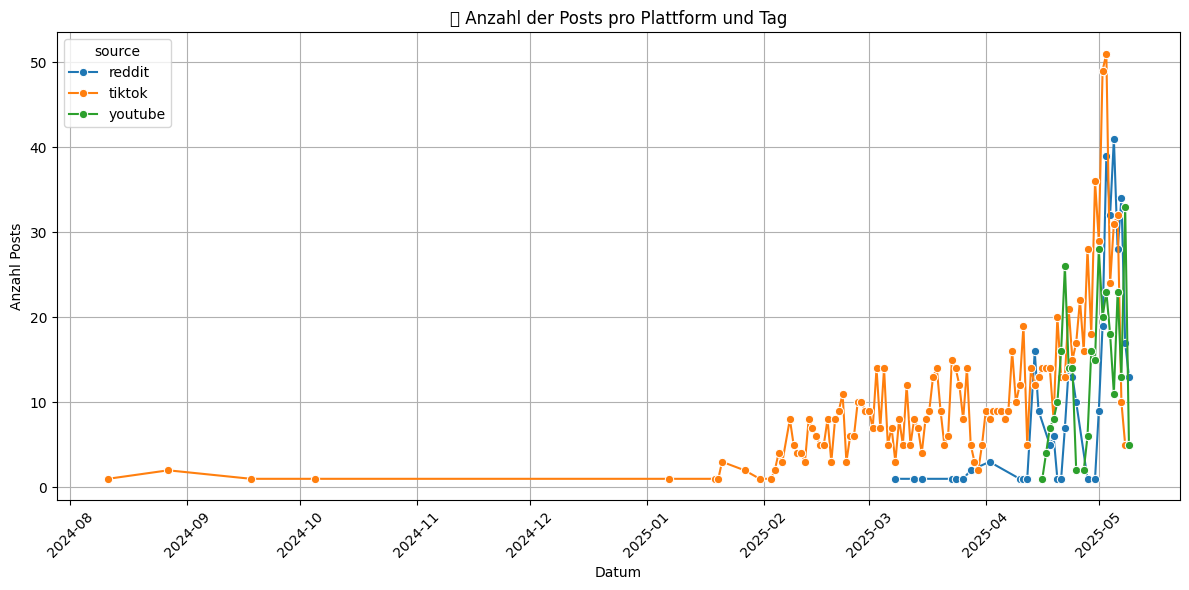

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Beide Spalten sicher in datetime umwandeln
df_combined["published_at"] = pd.to_datetime(df_combined.get("published_at"), errors="coerce", utc=True)
df_combined["timestamp"] = pd.to_datetime(df_combined.get("timestamp"), errors="coerce", utc=True)

# Zeilenweise Auswahl: published_at, falls vorhanden ‚Äì sonst timestamp
df_combined["datetime"] = df_combined.apply(
    lambda row: row["published_at"] if pd.notna(row["published_at"]) else row["timestamp"],
    axis=1
)

# Nur Datum extrahieren
df_combined["date"] = df_combined["datetime"].dt.date

# Anzahl der Posts pro Plattform pro Tag
posts_per_day = df_combined.groupby(["source", "date"]).size().reset_index(name="post_count")

# üìà Visualisierung
plt.figure(figsize=(12, 6))
sns.lineplot(data=posts_per_day, x="date", y="post_count", hue="source", marker="o")
plt.title("üìä Anzahl der Posts pro Plattform und Tag")
plt.xlabel("Datum")
plt.ylabel("Anzahl Posts")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## Detect language

In [170]:
from langdetect import detect, DetectorFactory, LangDetectException
import langid

DetectorFactory.seed = 0  # f√ºr konsistente langdetect-Ergebnisse

# üßº Text bereinigen vor Spracherkennung
def clean_for_langdetect(text: str) -> str:
    return re.sub(r"http\S+|@\S+|#\S+|[^a-zA-Z√§√∂√º√Ñ√ñ√ú√ü0-9\s]", " ", text).strip()

# üîç robuste Spracherkennung
def detect_language_robust(text: str) -> str:
    text = clean_for_langdetect(text)
    if not text or len(text.split()) == 0:
        return "unknown"
    try:
        return detect(text)
    except LangDetectException:
        pass
    lang_fallback, _ = langid.classify(text)
    return lang_fallback or "unknown"

# üìÑ Kopiere das Original-DataFrame
df_langs = df_combined.copy()

# üß™ Sprache erkennen f√ºr Spalte 'text'
df_langs["text"] = df_langs["text"].fillna("").astype(str)
df_langs["text_language"] = df_langs["text"].apply(detect_language_robust)

# üìä Anzahl Texte pro Sprache und Plattform
language_summary = pd.crosstab(df_langs["source"], df_langs["text_language"])
display(language_summary)


text_language  af  ca  cs  cy  da   de   en  es  et  fi  fr  hr  hu  id  it  \
source                                                                        
reddit          0   0   0   0   0    1  312   2   1   0   0   0   0   0   0   
tiktok          9  14   3   8   4  119  417  17  13   6  39   1   3  15  31   
youtube         0   0   0   0   0  179  130   1   0   0   2   1   0   0   1   

text_language  lt  lv  nl  no  pl  pt  ro  sk  sl  so  sq  sv  sw  tl  tr  \
source                                                                      
reddit          0   0   2   0   0   1   0   0   0   1   0   0   0   2   0   
tiktok          1   1   9  15  24  20  13   2   7  11   2  11  10  20   3   
youtube         0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   

text_language  unknown  vi  
source                      
reddit               8   0  
tiktok             230   4  
youtube              0   0

In [171]:
# üîé Zeige die ersten 5 Texte mit nicht erkennbarer Sprache
unknown_samples = df_langs[df_langs["text_language"] == "unknown"].head(5)
display(unknown_samples)

source                   id title  \
0   tiktok  7493469801654881542  None   
1   tiktok  7489427780397010198  None   
2   tiktok  7492000423641959685  None   
9   tiktok  7477658166235286791  None   
15  tiktok  7489932324423978262  None   

                                                 text              username  \
0   #vairalvideo_foryoupage  #üá¶üá´ÿßÿ≤ÿ®⁄©_ÿ™ÿßÿ¨⁄©_Ÿæÿ¥ÿ™ŸàŸÜ_ÿ™ÿ±...            afgcap.cut   
1   #imapoliceofficer #tensheet #foryou #viral #fy...     backwheelbandit69   
2   #CapCut #ŸÇŸàÿßŸÑÿ®_ŸÉÿßÿ®_ŸÉÿßÿ™_ÿ¨ÿßŸáÿ≤Ÿá_ŸÑŸÑÿ™ÿµŸÖŸäŸÖ__üå¥‚ô• #ŸÉÿßÿ®_...  noordeen_cap_cat_0_1   
9   #mascotas #humormascotasüòÇüòÇ #mascotastiktok #vi...           rokopitbull   
15             #fyp #videoviral #relatable #ukcomedy             amzszinotv   

       likes  comments   shares     plays                 timestamp  \
0      15800       258      451    365200 2025-04-15 09:30:06+00:00   
1    4300000     11300   303800  41900000 2025-04-04 12:04:57+00:00   
2      58400       451     1576   1300000 2025-04-11 10:28:10+00:00   
9   14800000     37500  2200000  99400000 2025-03-03 18:52:49+00:00   
15   4100000     16000   829800  33300000 2025-04-05 20:42:47+00:00   

   published_at                                                url  \
0           NaT  https://v16-webapp-prime.tiktok.com/video/tos/...   
1           NaT  https://v16-webapp-prime.tiktok.com/video/tos/...   
2           NaT  https://v16-webapp-prime.tiktok.com/video/tos/...   
9           NaT  https://webapp-sg.tiktok.com/a3091924f7ce0fd71...   
15          NaT  https://v16-webapp-prime.tiktok.com/video/tos/...   

                    datetime        date text_language  
0  2025-04-15 09:30:06+00:00  2025-04-15       unknown  
1  2025-04-04 12:04:57+00:00  2025-04-04       unknown  
2  2025-04-11 10:28:10+00:00  2025-04-11       unknown  
9  2025-03-03 18:52:49+00:00  2025-03-03       unknown  
15 2025-04-05 20:42:47+00:00  2025-04-05       unknown

# 6. Feature Engineering

In [172]:
from textblob import TextBlob

In [173]:
from nltk.corpus import stopwords

SUPPORTED_LANGS = {
    "en": "english",
    "de": "german",
    "fr": "french",
    "es": "spanish",
    "it": "italian",
    # du kannst beliebig erweitern
}

STOPWORDS_MAP = {
    lang: set(stopwords.words(nltk_lang))
    for lang, nltk_lang in SUPPORTED_LANGS.items()
}
DEFAULT_STOPWORDS = STOPWORDS_MAP["en"]

In [174]:
def deep_clean_text_with_lang(text: str, lang: str) -> str:
    text = str(text).lower()
    text = re.sub(r"http\S+|@\S+|#\S+|[^\w\s]", " ", text)
    text = re.sub(r"\d+", " ", text)

    tokens = word_tokenize(text)
    stop_words = STOPWORDS_MAP.get(lang, DEFAULT_STOPWORDS)
    tokens = [w for w in tokens if w not in stop_words]

    return " ".join(tokens).strip()

In [175]:
# üìä Textstatistiken
def extract_text_features(text: str) -> dict:
    try:
        text = str(text).strip()
        words = text.split()
        return {
            'char_count': len(text),
            'word_count': len(words),
            'uppercase_count': sum(1 for c in text if c.isupper()),
            'exclamation_count': text.count('!'),
            'question_count': text.count('?'),
            'emoji_count': len(re.findall(r'[^\w\s,]', text)),
            'mention_count': text.count('@'),
            'hashtag_count': text.count('#'),
            'avg_word_length': (sum(len(w) for w in words) / len(words)) if words else 0,
        }
    except Exception as e:
        print(f"‚ö†Ô∏è Fehler in extract_text_features: {e}")
        return {k: 0 for k in [
            'char_count', 'word_count', 'uppercase_count',
            'exclamation_count', 'question_count', 'emoji_count',
            'mention_count', 'hashtag_count', 'avg_word_length']}

# üìà Sentimentanalyse
def analyze_sentiment(text: str) -> tuple[str, float]:
    try:
        text = str(text).strip()
        if not text:
            return ("neutral", 0.0)
        blob = TextBlob(text)
        polarity = blob.sentiment.polarity
        if polarity > 0.1: return ("positive", polarity)
        elif polarity < -0.1: return ("negative", polarity)
        else: return ("neutral", polarity)
    except Exception as e:
        print(f"‚ö†Ô∏è Fehler in analyze_sentiment: {e}")
        return ("neutral", 0.0)

# üì¶ Feature-Anreicherung f√ºr Textspalten
def add_text_features(df: pd.DataFrame, text_cols: list[str]) -> pd.DataFrame:
    df = df.copy().reset_index(drop=True)

    for col in text_cols:
        df[col] = df[col].fillna("").astype(str)
        df[f"{col}_language"] = df[col].apply(detect_language_robust)
        df[f"{col}_clean"] = df.apply(lambda row: deep_clean_text_with_lang(row[col], row[f"{col}_language"]), axis=1)

        # Textstatistiken
        feature_df = df[f"{col}_clean"].apply(extract_text_features).apply(pd.Series)
        feature_df.columns = [f"{col}_{c}" for c in feature_df.columns]
        df = pd.concat([df, feature_df], axis=1)

        # Sentiment
        sentiment_df = df[f"{col}_clean"].apply(lambda x: pd.Series(analyze_sentiment(x)))
        sentiment_df.columns = [f"{col}_sentiment", f"{col}_sentiment_score"]
        df = pd.concat([df, sentiment_df], axis=1)

    return df

text_cols = ['title', 'text']
df_featured = add_text_features(df_combined, text_cols)

df_featured.head()

source                   id title  \
0  tiktok  7493469801654881542         
1  tiktok  7489427780397010198         
2  tiktok  7492000423641959685         
3  tiktok  7472584144510373125         
4  tiktok  7461927005689302280         

                                                text               username  \
0  #vairalvideo_foryoupage  #üá¶üá´ÿßÿ≤ÿ®⁄©_ÿ™ÿßÿ¨⁄©_Ÿæÿ¥ÿ™ŸàŸÜ_ÿ™ÿ±...             afgcap.cut   
1  #imapoliceofficer #tensheet #foryou #viral #fy...      backwheelbandit69   
2  #CapCut #ŸÇŸàÿßŸÑÿ®_ŸÉÿßÿ®_ŸÉÿßÿ™_ÿ¨ÿßŸáÿ≤Ÿá_ŸÑŸÑÿ™ÿµŸÖŸäŸÖ__üå¥‚ô• #ŸÉÿßÿ®_...   noordeen_cap_cat_0_1   
3                          i think it was a bad idea             maligoshik   
4  welcome to the thanos world!! #squidgame #squi...  team_thanos_player230   

      likes  comments   shares      plays                 timestamp  \
0     15800       258      451     365200 2025-04-15 09:30:06+00:00   
1   4300000     11300   303800   41900000 2025-04-04 12:04:57+00:00   
2     58400       451     1576    1300000 2025-04-11 10:28:10+00:00   
3  18000000     24000  1300000  168600000 2025-02-18 02:43:04+00:00   
4    261400     13000     9526   12400000 2025-01-20 09:27:52+00:00   

  published_at                                                url  \
0          NaT  https://v16-webapp-prime.tiktok.com/video/tos/...   
1          NaT  https://v16-webapp-prime.tiktok.com/video/tos/...   
2          NaT  https://v16-webapp-prime.tiktok.com/video/tos/...   
3          NaT  https://v16-webapp-prime.tiktok.com/video/tos/...   
4          NaT  https://webapp-sg.tiktok.com/bf63b8aa40b9ff0ca...   

                   datetime        date title_language title_clean  \
0 2025-04-15 09:30:06+00:00  2025-04-15        unknown               
1 2025-04-04 12:04:57+00:00  2025-04-04        unknown               
2 2025-04-11 10:28:10+00:00  2025-04-11        unknown               
3 2025-02-18 02:43:04+00:00  2025-02-18        unknown               
4 2025-01-20 09:27:52+00:00  2025-01-20        unknown               

   title_char_count  title_word_count  title_uppercase_count  \
0               0.0               0.0                    0.0   
1               0.0               0.0                    0.0   
2               0.0               0.0                    0.0   
3               0.0               0.0                    0.0   
4               0.0               0.0                    0.0   

   title_exclamation_count  title_question_count  title_emoji_count  \
0                      0.0                   0.0                0.0   
1                      0.0                   0.0                0.0   
2                      0.0                   0.0                0.0   
3                      0.0                   0.0                0.0   
4                      0.0                   0.0                0.0   

   title_mention_count  title_hashtag_count  title_avg_word_length  \
0                  0.0                  0.0                    0.0   
1                  0.0                  0.0                    0.0   
2                  0.0                  0.0                    0.0   
3                  0.0                  0.0                    0.0   
4                  0.0                  0.0                    0.0   

  title_sentiment  title_sentiment_score text_language            text_clean  \
0         neutral                    0.0       unknown                         
1         neutral                    0.0       unknown                         
2         neutral                    0.0       unknown                         
3         neutral                    0.0            en        think bad idea   
4         neutral                    0.0            en  welcome thanos world   

   text_char_count  text_word_count  text_uppercase_count  \
0              0.0              0.0                   0.0   
1              0.0              0.0                   0.0   
2              0.0              0.0                   0.0   
3             

## Berechnen der Engagement rate

In [176]:
# Textverarbeitung & Berechnung der Engagement-Rate
def enrich_data(df, engagement_numerator_cols=None, engagement_denominator_col=None):
    df = df.copy()

    # Berechnung der Engagement Rate (wenn nicht vorhanden)
    if "engagement_rate" not in df.columns and engagement_numerator_cols and engagement_denominator_col in df.columns:
        try:
            numerator = df[engagement_numerator_cols].sum(axis=1)
            denominator = df[engagement_denominator_col].replace(0, np.nan)
            df['engagement_rate'] = (numerator / denominator).replace([np.inf, -np.inf], np.nan)
        except Exception as e:
            print(f"‚ö†Ô∏è Engagement-Rate konnte nicht berechnet werden: {e}")
    
    return df

# Anreicherung mit Textverarbeitung und Engagement Rate
df_enriched = enrich_data(
    df_featured,
    engagement_numerator_cols=['likes', 'comments'],
    engagement_denominator_col='plays'
)

df_enriched.head()

C:\Users\SofiePischl\AppData\Local\Temp\ipykernel_9844\2967097343.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  denominator = df[engagement_denominator_col].replace(0, np.nan)


source                   id title  \
0  tiktok  7493469801654881542         
1  tiktok  7489427780397010198         
2  tiktok  7492000423641959685         
3  tiktok  7472584144510373125         
4  tiktok  7461927005689302280         

                                                text               username  \
0  #vairalvideo_foryoupage  #üá¶üá´ÿßÿ≤ÿ®⁄©_ÿ™ÿßÿ¨⁄©_Ÿæÿ¥ÿ™ŸàŸÜ_ÿ™ÿ±...             afgcap.cut   
1  #imapoliceofficer #tensheet #foryou #viral #fy...      backwheelbandit69   
2  #CapCut #ŸÇŸàÿßŸÑÿ®_ŸÉÿßÿ®_ŸÉÿßÿ™_ÿ¨ÿßŸáÿ≤Ÿá_ŸÑŸÑÿ™ÿµŸÖŸäŸÖ__üå¥‚ô• #ŸÉÿßÿ®_...   noordeen_cap_cat_0_1   
3                          i think it was a bad idea             maligoshik   
4  welcome to the thanos world!! #squidgame #squi...  team_thanos_player230   

      likes  comments   shares      plays                 timestamp  \
0     15800       258      451     365200 2025-04-15 09:30:06+00:00   
1   4300000     11300   303800   41900000 2025-04-04 12:04:57+00:00   
2     58400       451     1576    1300000 2025-04-11 10:28:10+00:00   
3  18000000     24000  1300000  168600000 2025-02-18 02:43:04+00:00   
4    261400     13000     9526   12400000 2025-01-20 09:27:52+00:00   

  published_at                                                url  \
0          NaT  https://v16-webapp-prime.tiktok.com/video/tos/...   
1          NaT  https://v16-webapp-prime.tiktok.com/video/tos/...   
2          NaT  https://v16-webapp-prime.tiktok.com/video/tos/...   
3          NaT  https://v16-webapp-prime.tiktok.com/video/tos/...   
4          NaT  https://webapp-sg.tiktok.com/bf63b8aa40b9ff0ca...   

                   datetime        date title_language title_clean  \
0 2025-04-15 09:30:06+00:00  2025-04-15        unknown               
1 2025-04-04 12:04:57+00:00  2025-04-04        unknown               
2 2025-04-11 10:28:10+00:00  2025-04-11        unknown               
3 2025-02-18 02:43:04+00:00  2025-02-18        unknown               
4 2025-01-20 09:27:52+00:00  2025-01-20        unknown               

   title_char_count  title_word_count  title_uppercase_count  \
0               0.0               0.0                    0.0   
1               0.0               0.0                    0.0   
2               0.0               0.0                    0.0   
3               0.0               0.0                    0.0   
4               0.0               0.0                    0.0   

   title_exclamation_count  title_question_count  title_emoji_count  \
0                      0.0                   0.0                0.0   
1                      0.0                   0.0                0.0   
2                      0.0                   0.0                0.0   
3                      0.0                   0.0                0.0   
4                      0.0                   0.0                0.0   

   title_mention_count  title_hashtag_count  title_avg_word_length  \
0                  0.0                  0.0                    0.0   
1                  0.0                  0.0                    0.0   
2                  0.0                  0.0                    0.0   
3                  0.0                  0.0                    0.0   
4                  0.0                  0.0                    0.0   

  title_sentiment  title_sentiment_score text_language            text_clean  \
0         neutral                    0.0       unknown                         
1         neutral                    0.0       unknown                         
2         neutral                    0.0       unknown                         
3         neutral                    0.0            en        think bad idea   
4         neutral                    0.0            en  welcome thanos world   

   text_char_count  text_word_count  text_uppercase_count  \
0              0.0              0.0                   0.0   
1              0.0              0.0                   0.0   
2              0.0              0.0                   0.0   
3             

## Normalisierung

In [177]:
# Normalisiert ausgew√§hlte numerische Spalten zwischen 0 und 1
def normalize_metrics(df, columns):
    df = df.copy()
    valid_cols = []

    for col in columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
            df[col] = df[col].replace([np.inf, -np.inf], np.nan).fillna(df[col].mean())
            valid_cols.append(col)
        else:
            print(f"‚ö†Ô∏è Spalte '{col}' nicht gefunden ‚Äì wird √ºbersprungen.")

    if not valid_cols:
        print("‚ùå Keine g√ºltigen Spalten zum Normalisieren.")
        return df

    scaler = MinMaxScaler()
    df[valid_cols] = scaler.fit_transform(df[valid_cols])
    return df

# Normalisierung von Metriken
df_normalized = normalize_metrics(df_enriched, ['likes', 'comments', 'shares', 'plays', 'engagement_rate'])
df_normalized.head()

source                   id title  \
0  tiktok  7493469801654881542         
1  tiktok  7489427780397010198         
2  tiktok  7492000423641959685         
3  tiktok  7472584144510373125         
4  tiktok  7461927005689302280         

                                                text               username  \
0  #vairalvideo_foryoupage  #üá¶üá´ÿßÿ≤ÿ®⁄©_ÿ™ÿßÿ¨⁄©_Ÿæÿ¥ÿ™ŸàŸÜ_ÿ™ÿ±...             afgcap.cut   
1  #imapoliceofficer #tensheet #foryou #viral #fy...      backwheelbandit69   
2  #CapCut #ŸÇŸàÿßŸÑÿ®_ŸÉÿßÿ®_ŸÉÿßÿ™_ÿ¨ÿßŸáÿ≤Ÿá_ŸÑŸÑÿ™ÿµŸÖŸäŸÖ__üå¥‚ô• #ŸÉÿßÿ®_...   noordeen_cap_cat_0_1   
3                          i think it was a bad idea             maligoshik   
4  welcome to the thanos world!! #squidgame #squi...  team_thanos_player230   

      likes  comments    shares     plays                 timestamp  \
0  0.000407  0.000566  0.000096  0.001126 2025-04-15 09:30:06+00:00   
1  0.110825  0.024776  0.064638  0.129241 2025-04-04 12:04:57+00:00   
2  0.001505  0.000989  0.000335  0.004010 2025-04-11 10:28:10+00:00   
3  0.463918  0.052621  0.276596  0.520049 2025-02-18 02:43:04+00:00   
4  0.006737  0.028503  0.002027  0.038248 2025-01-20 09:27:52+00:00   

  published_at                                                url  \
0          NaT  https://v16-webapp-prime.tiktok.com/video/tos/...   
1          NaT  https://v16-webapp-prime.tiktok.com/video/tos/...   
2          NaT  https://v16-webapp-prime.tiktok.com/video/tos/...   
3          NaT  https://v16-webapp-prime.tiktok.com/video/tos/...   
4          NaT  https://webapp-sg.tiktok.com/bf63b8aa40b9ff0ca...   

                   datetime        date title_language title_clean  \
0 2025-04-15 09:30:06+00:00  2025-04-15        unknown               
1 2025-04-04 12:04:57+00:00  2025-04-04        unknown               
2 2025-04-11 10:28:10+00:00  2025-04-11        unknown               
3 2025-02-18 02:43:04+00:00  2025-02-18        unknown               
4 2025-01-20 09:27:52+00:00  2025-01-20        unknown               

   title_char_count  title_word_count  title_uppercase_count  \
0               0.0               0.0                    0.0   
1               0.0               0.0                    0.0   
2               0.0               0.0                    0.0   
3               0.0               0.0                    0.0   
4               0.0               0.0                    0.0   

   title_exclamation_count  title_question_count  title_emoji_count  \
0                      0.0                   0.0                0.0   
1                      0.0                   0.0                0.0   
2                      0.0                   0.0                0.0   
3                      0.0                   0.0                0.0   
4                      0.0                   0.0                0.0   

   title_mention_count  title_hashtag_count  title_avg_word_length  \
0                  0.0                  0.0                    0.0   
1                  0.0                  0.0                    0.0   
2                  0.0                  0.0                    0.0   
3                  0.0                  0.0                    0.0   
4                  0.0                  0.0                    0.0   

  title_sentiment  title_sentiment_score text_language            text_clean  \
0         neutral                    0.0       unknown                         
1         neutral                    0.0       unknown                         
2         neutral                    0.0       unknown                         
3         neutral                    0.0            en        think bad idea   
4         neutral                    0.0            en  welcome thanos world   

   text_char_count  text_word_count  text_uppercase_count  \
0              0.0              0.0                   0.0   
1              0.0              0.0                   0.0   
2              0.0              0.0                   0.0   
3             

In [178]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   source                   1728 non-null   object             
 1   id                       1728 non-null   object             
 2   title                    1728 non-null   object             
 3   text                     1728 non-null   object             
 4   username                 1398 non-null   object             
 5   likes                    1728 non-null   float64            
 6   comments                 1728 non-null   float64            
 7   shares                   1728 non-null   float64            
 8   plays                    1728 non-null   float64            
 9   timestamp                1560 non-null   datetime64[ns, UTC]
 10  published_at             645 non-null    datetime64[ns, UTC]
 11  url                      1304 

## Weitere numerische features

In [179]:
def add_simple_features(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df['published_at'] = pd.to_datetime(df['published_at'], errors='coerce')

    def get_day_period(hour):
        if pd.isna(hour): return None
        if 5 <= hour < 12: return 'morning'
        elif 12 <= hour < 17: return 'afternoon'
        elif 17 <= hour < 21: return 'evening'
        else: return 'night'

    df['hour'] = df['published_at'].apply(lambda x: x.hour if pd.notna(x) else None)
    df['weekday'] = df['published_at'].apply(lambda x: x.day_name() if pd.notna(x) else None)
    df['year'] = df['published_at'].apply(lambda x: x.year if pd.notna(x) else None)
    df['month'] = df['published_at'].apply(lambda x: x.month if pd.notna(x) else None)
    df['day_period'] = df['hour'].apply(get_day_period)
    df['is_weekend'] = df['weekday'].isin(['Saturday', 'Sunday'])

    return df


df_final = add_simple_features(df_normalized)
df_final.head()

source                   id title  \
0  tiktok  7493469801654881542         
1  tiktok  7489427780397010198         
2  tiktok  7492000423641959685         
3  tiktok  7472584144510373125         
4  tiktok  7461927005689302280         

                                                text               username  \
0  #vairalvideo_foryoupage  #üá¶üá´ÿßÿ≤ÿ®⁄©_ÿ™ÿßÿ¨⁄©_Ÿæÿ¥ÿ™ŸàŸÜ_ÿ™ÿ±...             afgcap.cut   
1  #imapoliceofficer #tensheet #foryou #viral #fy...      backwheelbandit69   
2  #CapCut #ŸÇŸàÿßŸÑÿ®_ŸÉÿßÿ®_ŸÉÿßÿ™_ÿ¨ÿßŸáÿ≤Ÿá_ŸÑŸÑÿ™ÿµŸÖŸäŸÖ__üå¥‚ô• #ŸÉÿßÿ®_...   noordeen_cap_cat_0_1   
3                          i think it was a bad idea             maligoshik   
4  welcome to the thanos world!! #squidgame #squi...  team_thanos_player230   

      likes  comments    shares     plays                 timestamp  \
0  0.000407  0.000566  0.000096  0.001126 2025-04-15 09:30:06+00:00   
1  0.110825  0.024776  0.064638  0.129241 2025-04-04 12:04:57+00:00   
2  0.001505  0.000989  0.000335  0.004010 2025-04-11 10:28:10+00:00   
3  0.463918  0.052621  0.276596  0.520049 2025-02-18 02:43:04+00:00   
4  0.006737  0.028503  0.002027  0.038248 2025-01-20 09:27:52+00:00   

  published_at                                                url  \
0          NaT  https://v16-webapp-prime.tiktok.com/video/tos/...   
1          NaT  https://v16-webapp-prime.tiktok.com/video/tos/...   
2          NaT  https://v16-webapp-prime.tiktok.com/video/tos/...   
3          NaT  https://v16-webapp-prime.tiktok.com/video/tos/...   
4          NaT  https://webapp-sg.tiktok.com/bf63b8aa40b9ff0ca...   

                   datetime        date title_language title_clean  \
0 2025-04-15 09:30:06+00:00  2025-04-15        unknown               
1 2025-04-04 12:04:57+00:00  2025-04-04        unknown               
2 2025-04-11 10:28:10+00:00  2025-04-11        unknown               
3 2025-02-18 02:43:04+00:00  2025-02-18        unknown               
4 2025-01-20 09:27:52+00:00  2025-01-20        unknown               

   title_char_count  title_word_count  title_uppercase_count  \
0               0.0               0.0                    0.0   
1               0.0               0.0                    0.0   
2               0.0               0.0                    0.0   
3               0.0               0.0                    0.0   
4               0.0               0.0                    0.0   

   title_exclamation_count  title_question_count  title_emoji_count  \
0                      0.0                   0.0                0.0   
1                      0.0                   0.0                0.0   
2                      0.0                   0.0                0.0   
3                      0.0                   0.0                0.0   
4                      0.0                   0.0                0.0   

   title_mention_count  title_hashtag_count  title_avg_word_length  \
0                  0.0                  0.0                    0.0   
1                  0.0                  0.0                    0.0   
2                  0.0                  0.0                    0.0   
3                  0.0                  0.0                    0.0   
4                  0.0                  0.0                    0.0   

  title_sentiment  title_sentiment_score text_language            text_clean  \
0         neutral                    0.0       unknown                         
1         neutral                    0.0       unknown                         
2         neutral                    0.0       unknown                         
3         neutral                    0.0            en        think bad idea   
4         neutral                    0.0            en  welcome thanos world   

   text_char_count  text_word_count  text_uppercase_count  \
0              0.0              0.0                   0.0   
1              0.0              0.0                   0.0   
2              0.0              0.0                   0.0   
3             

# 8. Speichern der bereinigten Daten

In [180]:
PROCESSED_DIR = BASE_DIR / "./data/processed"
PROCESSED_DIR.mkdir(parents=True, exist_ok=True)

df_final.to_csv(PROCESSED_DIR / "social_media_data.csv", index=False)
print("‚úÖ Daten wurden erfolgreich gespeichert.")

‚úÖ Daten wurden erfolgreich gespeichert.
